In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

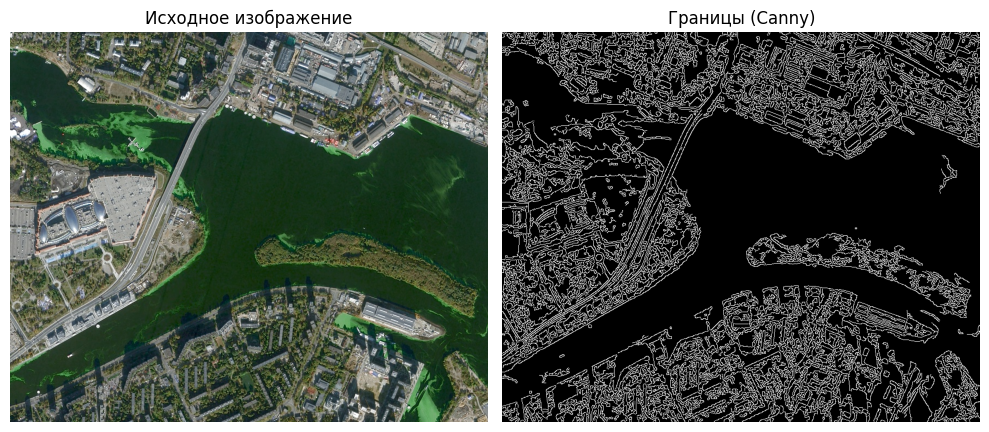

In [11]:
# === 1. Чтение изображения ===
# Замените "b.jpg" на путь к вашему файлу
img_bgr = cv2.imread("edge_b_river.png")
if img_bgr is None:
    raise IOError("Не удалось загрузить изображение. Проверьте путь к файлу!")

# Конвертируем в RGB для корректного отображения в matplotlib
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# === 2. Преобразование в полутоновое ===
gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

# === 3. Сглаживание (Гауссово размытие) ===
# Чем сильнее размытие, тем меньше ложных границ, но выше риск потери тонких деталей
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# === 4. Применение фильтра Кэнни ===
# Пороговые значения нужно подбирать экспериментально
# threshold1 - нижний порог, threshold2 - верхний порог
edges = cv2.Canny(blur, 20, 200)

# === 5. Отображение результатов ===
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(img_rgb)
axs[0].set_title("Исходное изображение")
axs[0].axis("off")

axs[1].imshow(edges, cmap="gray")
axs[1].set_title("Границы (Canny)")
axs[1].axis("off")

plt.tight_layout()
plt.show()

fig.savefig('canny.png')
